In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r'C:\Users\Aru\Downloads\archive (4)\UberDataset.csv')
np.mean(df['MILES'])
np.median(df['MILES'])
print(np.mean(df['MILES']))
print(np.median(df['MILES']))
df['PURPOSE'].value_counts()
df['CATEGORY'].value_counts()
print(df['CATEGORY'].value_counts())
print(df['PURPOSE'].value_counts())

#Most Uber trips in this dataset were for business purposes
#The average miles per trip was 21.11 miles
#The median miles per trip was 6 miles
#This indicates that was an oversampling of longer trips in the dataset

21.115397923875435
6.0
CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64
PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# 1. Kruskal-Wallis test for PURPOSE vs MILES

purposes = df['PURPOSE'].unique()
print(f"Unique PURPOSE values: {purposes}")

if len(purposes) < 2:
    print("ERROR: Kruskal-Wallis test requires at least 2 groups for PURPOSE")
else:
    #groups, explicitly handling potential errors
    purpose_groups = []
    for purpose in purposes:
        group = df[df['PURPOSE'] == purpose]['MILES'].dropna().values
        if len(group) > 0:
            purpose_groups.append(group)
        else:
            print(f"Warning: No data for PURPOSE='{purpose}'")
    
    # Only perform test if have at least 2 non-empty groups
    if len(purpose_groups) >= 2:
        h_stat_purpose, p_value_purpose = stats.kruskal(*purpose_groups)
        
        print("\nKruskal-Wallis Test: PURPOSE vs MILES")
        print(f"H-statistic: {h_stat_purpose:.4f}")
        print(f"p-value: {p_value_purpose:.4f}")  # This should display the p-value
        print(f"Significant relationship: {p_value_purpose < 0.05}")
    else:
        print("ERROR: Not enough non-empty groups for PURPOSE")

# 2. Kruskal-Wallis test for CATEGORY vs MILES

categories = df['CATEGORY'].unique()
print(f"\nUnique CATEGORY values: {categories}")

if len(categories) < 2:
    print("ERROR: Kruskal-Wallis test requires at least 2 groups for CATEGORY")
else:
    # Create groups, explicitly handling  errors
    category_groups = []
    for category in categories:
        group = df[df['CATEGORY'] == category]['MILES'].dropna().values
        if len(group) > 0:
            category_groups.append(group)
        else:
            print(f"Warning: No data for CATEGORY='{category}'")
    
    # Only perform test have at least 2 non-empty groups
    if len(category_groups) >= 2:
        h_stat_category, p_value_category = stats.kruskal(*category_groups)
        
        print("\nKruskal-Wallis Test: CATEGORY vs MILES")
        print(f"H-statistic: {h_stat_category:.4f}")
        print(f"p-value: {p_value_category:.4f}")  # This should display the p-value
        print(f"Significant relationship: {p_value_category < 0.05}")
    else:
        print("ERROR: Not enough non-empty groups for CATEGORY")
        
        #The kruskall wallis test was used as an ANOVA alternative to test the relationship
        #between these categorical variables (PURPOSE AND CATEGORY) and the miles variable.
        #According to the results, there is a significant relationship between PURPOSE and MILES
        #as well as between CATEGORY and MILES.

Unique PURPOSE values: ['Meal/Entertain' nan 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']

Kruskal-Wallis Test: PURPOSE vs MILES
H-statistic: 216.7310
p-value: 0.0000
Significant relationship: True

Unique CATEGORY values: ['Business' 'Personal' nan]

Kruskal-Wallis Test: CATEGORY vs MILES
H-statistic: 5.6296
p-value: 0.0177
Significant relationship: True


C:\Users\Aru\AppData\Local\Temp\ipykernel_13868\3617217041.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='PURPOSE', y='MILES', data=df, palette='viridis', inner='quartile')


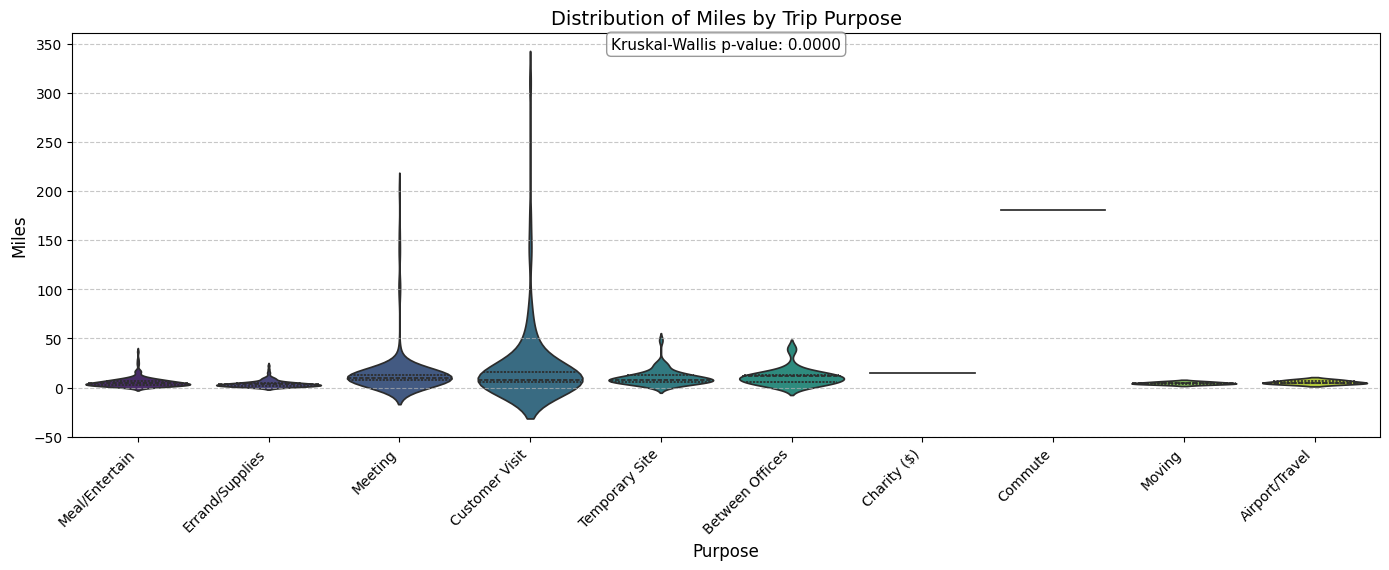

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))

# Violin plot for PURPOSE vs MILES
plt.subplot(2, 1, 1)
sns.violinplot(x='PURPOSE', y='MILES', data=df, palette='viridis', inner='quartile')
plt.title('Distribution of Miles by Trip Purpose', fontsize=14)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Miles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add p-value annotation for PURPOSE
if 'p_value_purpose' in locals():
    plt.annotate(f'Kruskal-Wallis p-value: {p_value_purpose:.4f}', 
                xy=(0.5, 0.96), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('miles_violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

#These violin plots shows that the highest miles traveled are for meetings, customer visits, travel between offices
#travel to temporary sites


In [ ]:
#Taken together we can see that the vast majority of reasons for Uber trips in this dataset were for business purposes,
#such as Meetings, Meals/Entertainment, Errands/for supplies, customer visit, travel to temporary sites and travel between offices     
#The farthest miles traveled were for customer visits, travel between offices, travel to temporary sites, and meetings.
#The final result indicates that the uber trips are mainly for business purposes, and are longer than personal trips.
#This is only according to this dataset, and may not be generalizable to all Uber trips.
#More studies are needed, and would have to include other rideshare companies to make a generalizable conclusion.
